# Crater morphometry

The very same databases can be used for some morphometric observations of impact craters. The literature is also vast and this notebook does not aim at any completeness.

Certain databases allow to perform e.g. depth-diameter ratio analyses (e.g. Wang et al., 2020), based on the observations included in some of the database fields. Others include morphologic characterisations, e.g. Lagain et al. 2021 see also e.g. Barlow et al. (2005)

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## The Moon

### Loading Wang 2020 database

i.e. https://zenodo.org/record/4983248#.Y_x3ly8w1qs

see also Wang et al. (2021)

In [2]:
# load wang database

input_wang_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Moon_wang/LU1319373_Wang & Wu_2021.txt'
moon_wang=pd.read_table(input_wang_mars, skiprows=16)  # skips
# rename "Lonitude" to "Longitude"
moon_wang.rename(columns={'Lonitude(degree)': 'Longitude(degree)'}, inplace=True)
moon_wang.head()

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m)
0,1,-180.0,11.9500,2755.8,120.0,0,0.0,0.0000,0.0
1,2,-180.0,12.1700,3061.2,194.5,0,0.0,0.0000,0.0
2,3,-180.0,10.0700,5882.0,369.5,0,0.0,0.0000,0.0
3,4,-180.0,20.0910,1503.0,72.5,1,0.0,20.0910,1503.4
4,5,-180.0,9.6476,3900.0,347.5,1,180.0,9.6476,3899.7


In [3]:
# number of records
moon_wang.shape[0]

1319373

<AxesSubplot: xlabel='Longitude(degree)', ylabel='Latitude(degree)'>

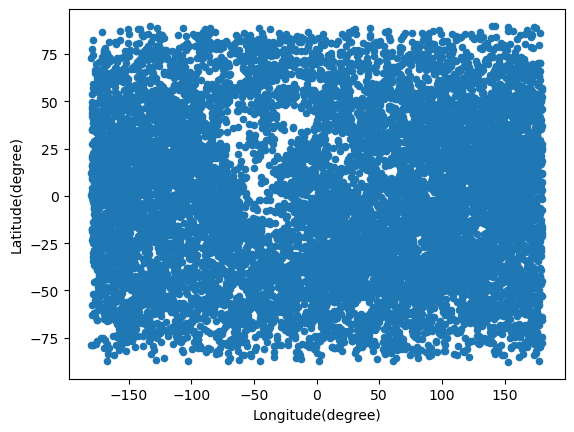

In [4]:
# subset for ease and speed
# decimating, for speed

moon_wang_decimated = moon_wang.iloc[::100, :]
moon_wang_decimated.plot.scatter(x='Longitude(degree)', y='Latitude(degree)')

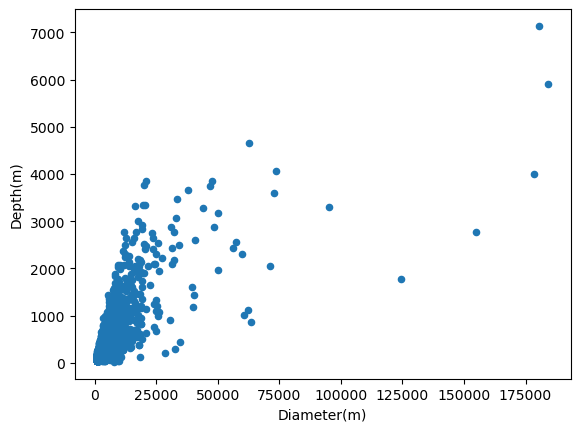

In [5]:
# Plot depth diameter relationship
ax = moon_wang_decimated.plot.scatter(x='Diameter(m)', y='Depth(m)')
# ax.set_xlim(50000,200000)
# ax.set_ylim(-90,90)

## Mercury

Some databases contain already interpreation fields (such as Lagain@Mars, e.g. specifying the ejecta types). Few have just diameters, or additional morphometric parameters, qualitative or quantitative.

In [6]:
# load fassett database

input_mercury_fassett = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Mercury_fassett/MercLargeCrats/MercLargeCrats.shp'

moon_mercury_fassett=gpd.read_file(input_mercury_fassett)  # skips
# rename "Lonitude" to "Longitude"
# moon_wang.rename(columns={'Lonitude(degree)': 'Longitude(degree)'}, inplace=True)
moon_mercury_fassett.head()

,Diam_km,x_coord,y_coord,geometry
0,25.898448,1.637668,69.850060,"POLYGON ((-7595717.577 2961873.009, -7599747.9..."
1,21.395362,1.661689,68.680642,"POLYGON ((-7594712.037 2914284.638, -7597896.4..."
2,31.818250,3.210281,55.208258,"POLYGON ((-7528692.020 2335171.219, -7532280.3..."
3,35.587341,2.713006,43.383394,"POLYGON ((-7549936.584 1829743.872, -7552326.0..."
4,36.119241,6.551369,43.041879,"POLYGON ((-7386475.877 1814945.699, -7388887.4..."


In [7]:
input_mercury_herrick = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Mercury_herrick/mercury_craters_postflybys.csv'
mercury_herrick=pd.read_csv(input_mercury_herrick)  # skips
mercury_herrick.head()

,id,lat_n,lon_e_0,int_shp,rim_shp,cent_struc,rayed,name,diameter
0,1,88.3,-133.3,ff,t,n,n,,37.6
1,4,88.6,-106.6,b,c,n,n,,10.6
2,5,86.8,-146.1,ff,t,n,n,,33.9
3,7,87.5,-96.6,ff,t,n,n,,40.1
4,8,85.7,-171.6,ff,x,n,n,,27.2


## Mars

Beyond the Mars crater databases of Robbins & Hynek (2012) and Lagain (2021), there is also the updated 2020 version of Robbins' from: http://craters.sjrdesign.net. See also ref. therein,  as well as Barlow (2019)

In [8]:
# load robbins 2020 update database

input_robbins2020_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Mars_Robbins/Catalog_Mars_Release_2020_1kmPlus_FullMorphData.csv'
mars_robbins2020=gpd.read_file(input_robbins2020_mars)
mars_robbins2020.head()

,CRATER_ID,LAT_CIRC_IMG,LON_CIRC_IMG,LAT_ELLI_IMG,LON_ELLI_IMG,DIAM_CIRC_IMG,DIAM_CIRC_SD_IMG,DIAM_ELLI_MAJOR_IMG,DIAM_ELLI_MINOR_IMG,DIAM_ELLI_ECCEN_IMG,...,LAY_NOTES,INT_MORPH1,INT_MORPH2,INT_MORPH3,CONF,NOTES,DEG_RIM,DEG_EJC,DEG_FLR,geometry
0,01-1-000003,79.2575988,211.9099494,79.25758354,211.9100208,19.52669825,0.230187464,19.7467177,19.28604071,0.21474248,...,,CpxUnc,,Floor Deposits,,,1,1,1,None
1,01-1-000004,78.6965116,207.1623444,78.69651692,207.1621048,4.232291035,0.089167117,4.449179592,4.019798471,0.42860481,...,,,,Floor Deposits,,,3,2,1,None
2,01-1-000012,77.79142155,186.5860227,77.79144282,186.5856895,8.542041746,0.193029989,8.818632104,8.251528194,0.352816507,...,,CpxFF,,,,,2,2,2,None
3,01-1-000013,76.65503965,194.8078115,76.65502023,194.8079728,7.967843133,0.13929006,8.268588934,7.662693446,0.375744667,...,,CpxFF,,,,,3,2,3,None
4,01-1-000014,76.97628464,195.6157949,76.97629427,195.6162545,20.94887777,0.340399304,21.55089289,20.32690217,0.332212292,...,,CpxFF,,Floor Deposits,,,3,2,3,None


## Ganymede (LPI, Schenk)

In [11]:
input_schenk_ganymede = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Ganymede_LPI/gcraters.tab'
schenk_ganymede = pd.read_table(input_schenk_ganymede, skiprows=1)

In [12]:
schenk_ganymede.head()

,Name,Crater Type,Latitude,Longitude,dome/depression,central pit/ring,rim,rim (predicted),pedestal,ejecta,rings,Terrace Width,Rimwall Width,Rim Height,Depth,Depth Method,Terrain,Image,Resolution,Note
0,Gilgamesh,MR,-62,124,144,306,588,NaN,769,1073,~1000,NaN,NaN,NaN,1 to 3,"sh, st",b,20639.15,0.6,"inner massif ring & smooth area, outer furrow ..."
1,Galileo-Marius Regio,MV,-21,179,NaN,NaN,NaN,<3000,NaN,NaN,>8300,NaN,NaN,NaN,NaN,NaN,dc,numerous,0.7,"multiple furrows, center obscured; see 20631.0..."
2,Nicholson Regio,MV,38,32,NaN,NaN,NaN,<3000,NaN,NaN,>6000,NaN,NaN,NaN,NaN,NaN,dc,numerous,1.2,"multiple furrows, center obscured; Galileo target"
3,Perrine Regio,MV,56,46,NaN,NaN,NaN,<1000,NaN,NaN,~1580,NaN,NaN,NaN,NaN,NaN,dc,16405.46,1.1,"multiple furrows, center obscured; see also 16..."
4,E. Marius Regio,MV,-28,153,NaN,NaN,NaN,<500,NaN,NaN,~500,NaN,NaN,NaN,NaN,NaN,dc,20637.50,0.8,"several furrows, smooth central feature; Galil..."


In [70]:
# get only the craters where depth and rim diameter is not NaN

In [13]:
depth_diam_ganymede = schenk_ganymede.dropna(subset=['rim', 'Depth'])
depth_diam_ganymede[["rim", "Depth"]] = depth_diam_ganymede[["rim", "Depth"]].apply(pd.to_numeric,  errors='coerce')

/var/folders/r_/mgx8b__d1d3f6crcq1v69qm40000gn/T/ipykernel_9986/2212225355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depth_diam_ganymede[["rim", "Depth"]] = depth_diam_ganymede[["rim", "Depth"]].apply(pd.to_numeric,  errors='coerce')


In [14]:
# 
# simple_craters_ganymede = depth_diam_ganymede.query["'rim' > 10 "]

<AxesSubplot: xlabel='rim', ylabel='Depth'>

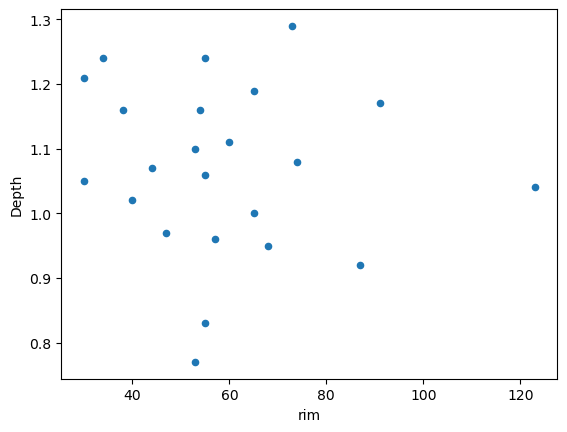

In [15]:
depth_diam_ganymede.plot.scatter(x='rim', y='Depth')

The longitiude type should be 360W+, therefore one could apply the same addition (not done here) of extra columns, for convenience, as in [planetary_craters.ipynb](./planetary_craters.ipynb).

## Callisto (LPI, Schenk)

In [18]:
input_schenk_callisto = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Callisto_LPI/ccraters.tab'
schenk_callisto = pd.read_table(input_schenk_callisto, skiprows=1)

In [19]:
schenk_callisto.head()

,Name,Crater Type,Latitude,Longitude,central dome,central pit/ring,rim,rim (predicted),pedestal,ejecta,rings,Terrace Width,Rimwall Width,Rim Height,Depth,Depth Method,Terrain,Image,Resolution,Note
0,Valhalla,MV,15,56,NaN,NaN,NaN,980.0,NaN,~1800,~3800,NaN,NaN,NaN,NaN,NaN,dc,numerous,1.0,"numerous furrows, ridges, central bright floor..."
1,Asgard,MV,32,142,NaN,NaN,NaN,660.0,NaN,~1400,~1880,NaN,NaN,NaN,NaN,NaN,dc,20606.21,3.0,"numerous furrows, central bright floor deposit..."
2,ZS05:232,MV,-5,232,NaN,NaN,NaN,NaN,NaN,NaN,~550,NaN,NaN,NaN,NaN,NaN,dc,20617.21,1.7,furrows
3,ZN34:358,MV,34,358,NaN,NaN,NaN,NaN,NaN,NaN,~350,NaN,NaN,NaN,NaN,NaN,dc,16421.43,1.7,furrows; Galileo target
4,ZS64:350,PA,-64,350,NaN,NaN,NaN,295.0,~450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dc,16418.06,2.7,oblique view; Galileo target


In [21]:
depth_diam_callisto = schenk_callisto.dropna(subset=['rim', 'Depth'])
depth_diam_callisto[["rim", "Depth"]] = depth_diam_callisto[["rim", "Depth"]].apply(pd.to_numeric,  errors='coerce')

/var/folders/r_/mgx8b__d1d3f6crcq1v69qm40000gn/T/ipykernel_9986/2968110854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depth_diam_callisto[["rim", "Depth"]] = depth_diam_callisto[["rim", "Depth"]].apply(pd.to_numeric,  errors='coerce')


<AxesSubplot: xlabel='rim', ylabel='Depth'>

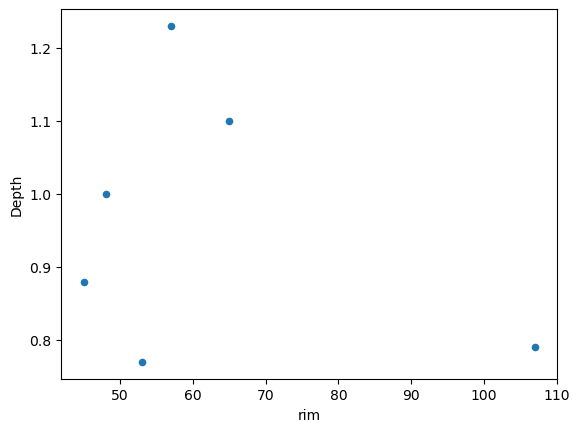

In [22]:
depth_diam_callisto.plot.scatter(x='rim', y='Depth')

## Ceres

In [34]:
# load ceres database

input_zeilnhofer_ceres = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Ceres_craters_Zeilnhofer/ceres_dawn_fc2_craterdatabase_zeilnhofer_2020/shapefile/ZeilnhoferMichaelCeresCraterDatabase.shp'
zeilnhofer_ceres = gpd.read_file(input_zeilnhofer_ceres)

In [35]:
zeilnhofer_ceres.head()

,Crater_ID,Latitude__,Longitude,Dc__km_,Minor_Dc__,Pres,Ejecta,Int_1,Int_2,Dpk__km_,...,Dp_Dc,rim__km_Me,d__km_Mean,rim__km_Ob,d__km_Obla,Comments,Comments_1,Comments_2,Comments_3,geometry
0,1039-846,-84.66,103.93,3.0,0.0,3,No,No,No,0.0,...,0.0,0.89,0.79,0.15,0.28,None,None,None,None,POINT (103.93000 -84.66000)
1,1097-846,-84.66,109.75,3.3,3.0,3,No,No,No,0.0,...,0.0,0.05,0.05,0.02,0.20,None,None,None,None,POINT (109.75000 -84.66000)
2,0925-835,-83.55,92.59,2.1,0.0,4,No,No,No,0.0,...,0.0,0.13,0.17,0.08,0.07,None,None,None,None,POINT (92.59000 -83.55000)
3,0351-832,-83.22,35.19,40.0,39.0,4,No,No,No,0.0,...,0.0,0.74,1.77,0.15,0.46,None,None,None,None,POINT (35.19000 -83.22000)
4,1090-831,-83.19,109.02,2.0,1.9,4,No,No,No,0.0,...,0.0,0.01,0.00,0.02,0.01,None,None,None,None,POINT (109.02000 -83.19000)


<AxesSubplot: >

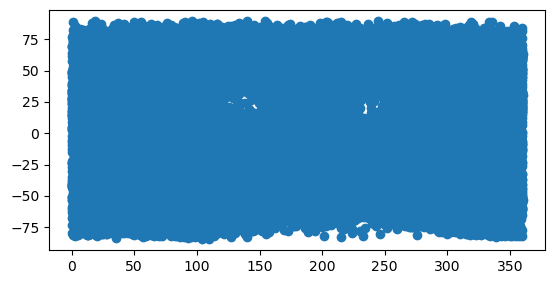

In [37]:
zeilnhofer_ceres.plot()

In [40]:
# probably not needed, but just in case...
depth_diam_ceres = zeilnhofer_ceres.dropna(subset=['Dc__km_', 'd__km_Mean'])
depth_diam_ceres[["Dc__km_", "d__km_Mean"]] = depth_diam_ceres[["Dc__km_", "d__km_Mean"]].apply(pd.to_numeric,  errors='coerce')

<AxesSubplot: xlabel='Dc__km_', ylabel='d__km_Mean'>

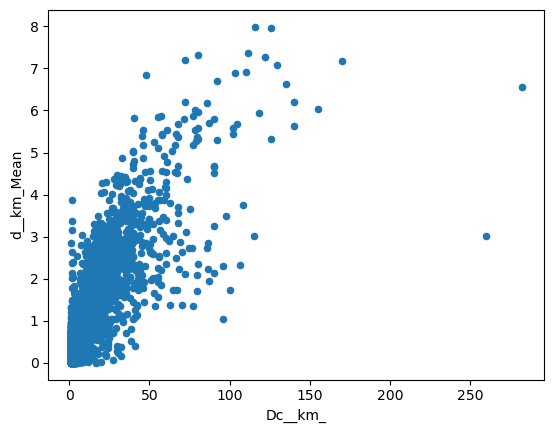

In [41]:
depth_diam_ceres.plot.scatter(x='Dc__km_', y='d__km_Mean')

## References

Barlow, N. G. (2005). A review of Martian impact crater ejecta structures and their implications for target properties. Large meteorite impacts III, 384, 433-442.

Barlow, N. G. (2019). Databases and Metadatabases in Planetary Geology—The Mars Crater Database. Planetary Cartography and GIS, 287-292.

Horner, V. and R. Greeley (1982). Pedestal craters on Ganymede, Icarus, 51, 549-562. 

Kenkmann, T. (2021). The terrestrial impact crater record: A statistical analysis of morphologies, structures, ages, lithologies, and more. Meteoritics & Planetary Science, 56(5), 1024-1070 - https://doi.org/10.1111/maps.13657

Lagain, A., Bouley, S., Baratoux, D., Marmo, C., Costard, F., Delaa, O., Rossi, A. P., Minin, M., Benedix, G.K., Ciocco, M. Bedos, B., Guimpier, A., Dehouck, E., Loizeau, D., Bouquety, A., Zhao, J., Vialatte, A., et al. (2021) “Mars Crater Database: A Participative Project for the Classification of the Morphological Characteristics of Large Martian Craters.” In Large Meteorite Impacts and Planetary Evolution VI, edited by Wolf Uwe Reimold and Christian Koeberl, 629–44. Geological Society of America. DOI: 10.1130/2021.2550(29). - https://doi.org/10.1130/2021.2550(29)

McKinnon, W. and H. Melosh (1980). Evolution of planetary lithospheres: Evidence from multi-ringed basins on Ganymede and Callisto, Icarus, 44, 454-471. 

Moore, J. and M. Malin (1988). Dome craters on Ganymede, Geophys. Res. Letters, 15, 225-228. 

Passey, Q. and G. Shoemaker (1982). Craters and Basins on Ganymede and Callisto, in Satellites of Jupiter, Univ. Arizona Press, Tucson. 

Robbins, S. J., & Hynek, B. M. (2012). A New Global Database of Mars Impact Craters ≥1 km: 1. Database Creation, Properties, and Parameters. Journal of Geophysical Research: Planets, 117(E5). https://doi.org/10.1029/2011JE003966

Robbins, S. J. (2019). A new global database of lunar impact craters> 1–2 km: 1. Crater locations and sizes, comparisons with published databases, and global analysis. Journal of Geophysical Research: Planets, 124(4), 871-892. - https://doi.org/10.1029/2018JE005592
Wang, Y., Wu, B., Xue, H., Li, X., & Ma, J. (2021). An improved global catalog of lunar impact craters (≥1 km) with 3D morphometric information and updates on global crater analysis. Journal of Geophysical Research: Planets, 126, e2020JE006728. - https://doi.org/10.1029/2020JE006728

Schenk, P. (1991). Ganymede and Callisto: Complex craters and planetary crusts, J. Geophys. Res., 96, 15635-15664. 

Schenk, P. and W. McKinnon (1985). Dark halo craters and the thickness of grooved terrain on Ganymede, J. Geophys. Res. (suppl.), 90, C775-C783. 

Schenk, P. and W. McKinnon (1991). Dark ray and dark floor craters on Ganymede, and the provenance of large impactors in the Jovian system, Icarus, 89, 318-346. 

Schenk, P. (1993). Central pit and dome craters: Exposing the interiors of Ganymede and Callisto, J. Geophys. Res., 98, 7475-7498. 

Schenk, P. (1996). Origin of palimpsests on Ganymede, Submitted to Geophys. Res. Lett. 

Thomas, P. and S. Squyres (1990). Formation of crater palimpsests on Ganymede, J. Geophys. Res., 95, 19161-19174. 

Schenk, P. and W. McKinnon (1987). Ring geometry on Ganymede and Callisto, Icarus, 72, 209-234.

Wang,Y, Wu. B. (2020). An Improved Global Catalog LU1319373 of Lunar Craters (≥1 km) with 3D Morphometric Information of Craters (Version 1) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4983248

Wang, Y., Wu, B., Xue, H., Li, X., & Ma, J. (2021). An improved global catalog of lunar impact craters (≥1 km) with 3D morphometric information and updates on global crater analysis. Journal of Geophysical Research: Planets, 126, e2020JE006728.

Wu, B., Wang, Y., Werner, S. C., Prieur, N. C., & Xiao, Z. (2022). A Global Analysis of Crater Depth/Diameter Ratios on the Moon. Geophysical Research Letters, 49(20), e2022GL100886 - https://doi.org/10.1029/2022GL100886

Zeilnhofer, M.F., Barlow, N.G., (2021). The morphologic and morphometric characteristics of craters on Ceres and implications for the crust. Icarus. 368, 114428. https://doi.org/10.1016/j.icarus.2021.114428

Zeilnhofer, M. (2020). A Global Analysis of Impact Craters on Ceres. ProQuest Dissertations & Theses Global, 1-251, proquest: 27963349, URL: https://search.proquest.com/openview/4e9a383f80b524bf68f755ff3649d02d